# Dataset curation
# Preparation of the training set

The training set will be composed by proteins with the kunitz domain downloaded on the PDB and on PDBefold.

### PDB Dataset
The PDB dataset was obtained through an advanced search, using as filters:
- The pfam identifier PF00014 (which stands for the kunitz domain)
- Data collection resolution <= 3
- Polymer entity mutation count = 0


In [ ]:
! wget https://raw.githubusercontent.com/pmastrogiovanni/kunitz_hmm/main/starting_files/pdb_ids.txt

In [2]:
! cat pdb_ids.txt

1BUN,4NTW,4NTX,4NTY,1BRB,1BRC,1BTH,1BZX,1CA0,1CBW,1CO7,1EAW,1EJM,1F5R,1F7Z,1FAK,1FY8,1MTN,1P2I,1P2J,1P2K,1P2M,1P2N,1P2O,1P2Q,1T7C,1T8L,1T8M,1T8N,1T8O,1TAW,1TFX,1TPA,1YC0,1YKT,1ZJD,1ZR0,2FI3,2FTL,2IJO,2KAI,2PTC,2R9P,2RA3,2TGP,2TPI,3BTD,3BTE,3BTF,3BTG,3BTH,3BTK,3BTM,3BTQ,3BTT,3BTW,3D65,3FP6,3FP8,3GYM,3L33,3M7Q,3OTJ,3T62,3TGI,3TGJ,3TGK,3TPI,3U1J,3UIR,3UOU,4BNR,4DG4,4DTG,4ISL,4ISN,4ISO,4TPI,4U30,4U32,4WWY,4WXV,5NX1,5NX3,6GFI,6HAR,1AAL,1AAP,1B0C,1BHC,1BIK,1BPI,1BPT,1BTI,1BZ5,1D0D,1DTX,1FAN,1KNT,1KTH,1NAG,2HEX,2KNT,2ODY,3BYB,3LDI,3LDJ,3LDM,3OFW,3WNY,4BD9,4PTI,5NMV,5PTI,5YVU,5YW1,5ZJ3,6PTI,6Q61,6YHY,7PTI,8PTI,9PTI,3FP7,5JBT


Since the standard download option from the PDB formats the IDs on a single row, some data processing is needed.

In [3]:
#to have each PDB id on a different row
! cat pdb_ids.txt |tr ',' '\n' >PDB-advanced-ID_only.txt

In [4]:
! head -n 5 PDB-advanced-ID_only.txt 

1BUN
4NTW
4NTX
4NTY
1BRB


In [5]:
! wc PDB-advanced-ID_only.txt

125 125 625 PDB-advanced-ID_only.txt


### PDBeFold Dataset
The dataset was downloaded on PDBe-fold, using the chain I of the 3tgi protein as reference structure.

In [ ]:
! wget https://raw.githubusercontent.com/pmastrogiovanni/kunitz_hmm/main/starting_files/pdbefold_summary.txt

In [7]:
! tail pdbefold_summary.txt

  643     0.04055    0.001348      0.4834     4.655    21    3    1     0.04762    0     56      4     57      4    PDB 3tgi:I  PDB 5aaq:A
  644     0.03984    0.000397      0.3721     4.694    30    3    3         0.1    0     56      4    117      4    PDB 3tgi:I  PDB 6tbm:O
  645      0.0373    0.001398      0.5804     4.814    28    3    4     0.03571    0     56      4    105      4    PDB 3tgi:I  PDB 6r6h:P
  646      0.0365     0.00767      0.6745     5.212    31    3    3     0.03226    0     56      4    117      4    PDB 3tgi:I  PDB 5mq4:C
  647     0.03488     0.03441      0.9695     4.611    27    3    2     0.07407    0     56      4    111      4    PDB 3tgi:I  PDB 6umg:c
  648     0.03392      0.2747       1.765     4.455    26    3    2           0    0     56      4    111      4    PDB 3tgi:I  PDB 5mq4:D
  649     0.02931     0.07331       1.174     4.677    25    3    2        0.08    0     56      4    111      4    PDB 3tgi:I  PDB 5mq4:B
  650     0.02929     0.070

In [8]:
! head pdbefold_summary.txt

 PDBe Fold v2.59. (src3) 14 Apr 2014 result file.

                   RESULT SUMMARY

   ##      Q-score      P-score     Z-score   RMSD    Nalgn Nsse Ngaps Seq-%     Nmd Nres-Q Nsse-Q Nres-T Nsse-T Query Target
    1           1       16.18       11.93     0.000    56    4    0           1    0     56      4     56      4    PDB 3tgi:I  PDB 3tgi:I
    2      0.9986       13.58        10.9     0.112    56    4    0           1    0     56      4     56      4    PDB 3tgi:I  PDB 1f7z:I
    3      0.9984       13.58        10.9     0.121    56    4    0           1    0     56      4     56      4    PDB 3tgi:I  PDB 1fy8:I
    4      0.9984       13.58        10.9     0.122    56    4    0           1    0     56      4     56      4    PDB 3tgi:I  PDB 1ykt:B
    5      0.9975       13.13       10.71     0.151    56    4    0           1    0     56      4     56      4    PDB 3tgi:I  PDB 3tgk:I


In [9]:
#To filter and take only the IDs of the proteins with a Z-score >= 3 and a RMSD <= 1.5
! awk '{if ($4>=3 && $5<=1.5) print toupper($NF)}' pdbefold_summary.txt > pdbefold_IDs-chain.txt

In [10]:
! head -n 5 pdbefold_IDs-chain.txt

3TGI:I
1F7Z:I
1FY8:I
1YKT:B
3TGK:I


In [11]:
! wc pdbefold_IDs-chain.txt

 336  336 2352 pdbefold_IDs-chain.txt


In [12]:
#To remove the chains
! awk '{print substr($0,1,length($0)-2)}' pdbefold_IDs-chain.txt > pdbefold_IDs.txt

In [13]:
! head -n 5 pdbefold_IDs.txt

3TGI
1F7Z
1FY8
1YKT
3TGK


In [14]:
! wc pdbefold_IDs.txt

 336  336 1680 pdbefold_IDs.txt


### Merged dataset
Now that all the IDs are isolated, taking the common ones from the 2 files, the chance of getting wrong data gets lowered

Then for each ID we will need to recover the fasta format with the sequence.


In [15]:
#To merge the 2 lists of IDs and take only the common ones
! comm -12 <(sort PDB-advanced-ID_only.txt) <(sort pdbefold_IDs.txt) > comm_IDs.txt

In [16]:
! wc comm_IDs.txt

119 119 595 comm_IDs.txt


In [17]:
#to recover the chains of the remaining IDs, which will be needed to get the sequence
! join -t $":" -j 1 <(sort comm_IDs.txt) <(sort pdbefold_IDs-chain.txt) > comm_IDchains.txt

In [18]:
! head -n 5 comm_IDchains.txt

1AAL:A
1AAL:B
1AAP:A
1AAP:B
1B0C:A


In [19]:
! wc comm_IDchains.txt

 205  205 1435 comm_IDchains.txt


In [ ]:
#Download all the reference sequences from the PDB
! wget https://ftp.rcsb.org/pub/pdb/derived_data/pdb_seqres.txt

In [21]:
! head pdb_seqres.txt

>101m_A mol:protein length:154  MYOGLOBIN
MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDRVKHLKTEAEMKASEDLKKHGVTVLTALGAILKKKGHHEAELKPLAQSHATKHKIPIKYLEFISEAIIHVLHSRHPGNFGADAQGAMNKALELFRKDIAAKYKELGYQG
>102l_A mol:protein length:165  T4 LYSOZYME
MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAAKSELDKAIGRNTNGVITKDEAEKLFNQDVDAAVRGILRNAKLKPVYDSLDAVRRAALINMVFQMGETGVAGFTNSLRMLQQKRWDEAAVNLAKSRWYNQTPNRAKRVITTFRTGTWDAYKNL
>102m_A mol:protein length:154  MYOGLOBIN
MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDRFKHLKTEAEMKASEDLKKAGVTVLTALGAILKKKGHHEAELKPLAQSHATKHKIPIKYLEFISEAIIHVLHSRHPGNFGADAQGAMNKALELFRKDIAAKYKELGYQG
>103l_A mol:protein length:167  T4 LYSOZYME
MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNSLDAAKSELDKAIGRNTNGVITKDEAEKLFNQDVDAAVRGILRNAKLKPVYDSLDAVRRAALINMVFQMGETGVAGFTNSLRMLQQKRWDEAAVNLAKSRWYNQTPNRAKRVITTFRTGTWDAYKNL
>103m_A mol:protein length:154  MYOGLOBIN
MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDRFKHLKTEAEMKASEDLKKAGVTVLTALGAILKKKGHHEAELKPLAQSHATKHKIPIKYLEFISEAIIHVLHSRHPGNFGADAQGAMNKALELFRKD

In [22]:
#To get the same format of the seqres file
! sed 's/:/ /g' comm_IDchains.txt | awk '{print tolower($1)"_"$2}' > comm_final_format.txt

In [23]:
! head -n 5 comm_final_format.txt

1aal_A
1aal_B
1aap_A
1aap_B
1b0c_A


In [24]:
#To obtain the sequences for our ID-chains
! for i in `cat comm_final_format.txt` ; do grep -A 1 ">"$i pdb_seqres.txt ; done > dataset.fasta

In [25]:
! head dataset.fasta

>1aal_A mol:protein length:58  BOVINE PANCREATIC TRYPSIN INHIBITOR
RPDFCLEPPYTGPCKARIIRYFYNAKAGLVQTFVYGGCRAKRNNFKSAEDAMRTCGGA
>1aal_B mol:protein length:58  BOVINE PANCREATIC TRYPSIN INHIBITOR
RPDFCLEPPYTGPCKARIIRYFYNAKAGLVQTFVYGGCRAKRNNFKSAEDAMRTCGGA
>1aap_A mol:protein length:58  ALZHEIMER'S DISEASE AMYLOID A4 PROTEIN
VREVCSEQAETGPCRAMISRWYFDVTEGKCAPFFYGGCGGNRNNFDTEEYCMAVCGSA
>1aap_B mol:protein length:58  ALZHEIMER'S DISEASE AMYLOID A4 PROTEIN
VREVCSEQAETGPCRAMISRWYFDVTEGKCAPFFYGGCGGNRNNFDTEEYCMAVCGSA
>1b0c_A mol:protein length:58  PROTEIN (PANCREATIC TRYPSIN INHIBITOR)
RPDFCLEPPYTGPCKARIIRYFYNAKAGLCQTFVYGGCRAKRNNFKSAEDCMRTCGGA


In [26]:
! wc dataset.fasta

  410  1514 25139 dataset.fasta


### Alignment
In order to build an Hidden Markov Model, an alignment of the sequences is needed. But first it's important to reduce redundancy, clusterizing the merged dataset.

In [ ]:
#To clusterize we will use cd-hit
! apt-get install cd-hit

In [28]:
#The -c option is used to set a cutoff
! cd-hit -i dataset.fasta -o clust_dataset.fasta -c 0.95

Program: CD-HIT, V4.7 (+OpenMP), Jul 01 2017, 08:43:07
Command: cd-hit -i dataset.fasta -o clust_dataset.fasta -c
         0.95

Started: Mon May 16 00:12:35 2022
                            Output                              
----------------------------------------------------------------
total seq: 205
longest and shortest : 100 and 43
Total letters: 12214
Sequences have been sorted

Approximated minimal memory consumption:
Sequence        : 0M
Buffer          : 1 X 10M = 10M
Table           : 1 X 65M = 65M
Miscellaneous   : 0M
Total           : 75M

Table limit with the given memory limit:
Max number of representatives: 4000000
Max number of word counting entries: 90512306

comparing sequences from          0  to        205

      205  finished         21  clusters

Apprixmated maximum memory consumption: 75M
writing new database
writing clustering information
program completed !

Total CPU time 0.07


In [29]:
#To prepare the ID chains for the PDBefold multiple structural alignment
! grep ">" clust_dataset.fasta | cut -d " " -f 1 | tr -d ">" |tr "_" ":" > sel_chains.txt

In [30]:
! head -n 5 sel_chains.txt

1brb:I
1dtx:A
1fak:I
1knt:A
1t8l:B


We are left with 21 proteins, which will be the representative for each cluster. The representatives are selected based on resolution.

In [31]:
#We replace 4bnr:I with 3tgi:I, to choose it as representative of that cluster, since it was used as seed to retrieve the original PDBeFold dataset
! sed 's/4bnr:I/3tgi:I/g' sel_chains.txt > sel_chains_final.txt

Inserting the text file on the PDBe-Fold, we obtained a multiple structural alignment file, which can be found on the Github repository.

In [ ]:
! wget https://raw.githubusercontent.com/pmastrogiovanni/kunitz_hmm/main/starting_files/alignment.txt

In [33]:
! head -n 8 alignment.txt

>PDB:1brb:I CRYSTAL STRUCTURES OF RAT ANIONIC TRYPSIN COMPLEXE
---------A---GEPPYT-G-PCkARIIRYFYNAKAGLCQTFVYGGCRAKRNNFKSAEDCMRTA----

>PDB:1dtx:A CRYSTAL STRUCTURE OF ALPHA-DENDROTOXIN FROM THE GR
-----eprrKl-cILHRNP-G-RCyDKIPAFYYNQKKKQCERFDWSGCGGNSNRFKTIEECRRTCig--

>PDB:1fak:I HUMAN TISSUE FACTOR COMPLEXED WITH COAGULATION FAC
-------apDf-cLEPPYD-G-PCrALHLRYFYNAKAGLCQTFYYGGCLAKRNNFESAEDCMRTC----


----

# HMM build
Starting from the alignment of the reference protein containing the kunitz domain, the hmm can now be built.

In [ ]:
! apt-get install hmmer

In [35]:
! hmmbuild kunitz.hmm alignment.txt

# hmmbuild :: profile HMM construction from multiple sequence alignments
# HMMER 3.1b2 (February 2015); http://hmmer.org/
# Copyright (C) 2015 Howard Hughes Medical Institute.
# Freely distributed under the GNU General Public License (GPLv3).
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# input alignment file:             alignment.txt
# output HMM file:                  kunitz.hmm
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

# idx name                  nseq  alen  mlen eff_nseq re/pos description
#---- -------------------- ----- ----- ----- -------- ------ -----------
1     alignment               21    69    58     2.36  0.961 

# CPU time: 0.06u 0.00s 00:00:00.06 Elapsed: 00:00:00.06


In [36]:
! head kunitz.hmm

HMMER3/f [3.1b2 | February 2015]
NAME  alignment
LENG  58
ALPH  amino
RF    no
MM    no
CONS  yes
CS    no
MAP   yes
DATE  Mon May 16 00:12:48 2022


# Model Optimization
To increase the accuracy of the model, we will do cross-validation starting from 2 subsets, composed by mixed positives and negatives.

### Preparation of the cross-validation dataset

The positive dataset was donwloaded on Uniprot through an advanced search, using as filters:
- pfam cross referenced (pf00014)
- Reviewed
- Not cross referenced to the PDB (to avoid taking proteins that were part of the training set)

In [ ]:
! wget https://raw.githubusercontent.com/pmastrogiovanni/kunitz_hmm/main/starting_files/uniprot_positives.fasta

In [38]:
! grep ">" uniprot_positives.fasta | wc

    336    3408   35234


The negatives dataset was also downloaded from Uniprot, using as filters:
- Not cross referenced to pfam id pf00014
- Reviewed
- Sequence lenght from 40 to 10000 (to reduce computation time)


In [ ]:
! gdown --id 1I0SSiJNIeoV8I4PeOA1wgxTDdK_vCqf3

In [40]:
! grep ">" uniprot_negatives.fasta | wc

 557267 8145603 72209028


In [41]:
#To build the subsets, first we isolate the identifiers
! grep ">" uniprot_positives.fasta | cut -d "|" -f 2 > pos_list.txt
! grep ">" uniprot_negatives.fasta | cut -d "|" -f 2 > neg_list.txt


In [42]:
#Then we shuffle them
! sort -R pos_list.txt > shuffle_pos_list.txt
! sort -R neg_list.txt > shuffle_neg_list.txt

In [43]:
#We divide the positives and negatives in 2 equal parts
#336/2 = 168
! head -n 168 shuffle_pos_list.txt > positives-1.txt
! tail -n 168 shuffle_pos_list.txt > positives-2.txt

#557267/2 = 278633.5
! head -n 278633 shuffle_neg_list.txt > negatives-1.txt
! tail -n 278634 shuffle_neg_list.txt > negatives-2.txt

Now that the ID lists of the 2 subsets are created, we can retrieve their sequences from the starting Uniprot files with a python script.

In [ ]:
! wget https://raw.githubusercontent.com/pmastrogiovanni/kunitz_hmm/main/py_scripts/fasta_parse.py

In [45]:
#We apply it on the positives
! python fasta_parse.py positives-1.txt uniprot_positives.fasta > positives-1.fasta
! python fasta_parse.py positives-2.txt uniprot_positives.fasta > positives-2.fasta

#and on the negatives
! python fasta_parse.py negatives-1.txt uniprot_negatives.fasta > negatives-1.fasta
! python fasta_parse.py negatives-2.txt uniprot_negatives.fasta > negatives-2.fasta



In [ ]:
#Test of the hmm on the subsets
!hmmsearch -Z 1 --domZ 1 --max --tblout positives-1.match kunitz.hmm positives-1.fasta
!hmmsearch -Z 1 --domZ 1 --max --tblout positives-2.match kunitz.hmm positives-2.fasta
!hmmsearch -Z 1 --domZ 1 --max --tblout negatives-1.match kunitz.hmm negatives-1.fasta
!hmmsearch -Z 1 --domZ 1 --max --tblout negatives-2.match kunitz.hmm negatives-2.fasta

In [47]:
#To get the e-values for the predictions
#We add a class column with 0 for negatives and 1 for positives
!grep -v "#" negatives-1.match | awk '{print $1,$8,0}' > negatives-1.class
!grep -v "#" negatives-2.match | awk '{print $1,$8,0}' > negatives-2.class
!grep -v "#" positives-1.match | awk '{print $1,$8,1}' > positives-1.class
!grep -v "#" positives-2.match | awk '{print $1,$8,1}' > positives-2.class

In [48]:
#Counting the negatives, we can see that many proteins didn't get past the evalue trashold
! wc negatives-1.class

 129167  387501 1662300 negatives-1.class


In [49]:
#We append the missing ones, setting as e-value 10 (generic high number)
! comm -23 <(sort negatives-1.txt) <(cut -d " " -f 1 negatives-1.class | sort) | awk '{print $1,10,0}' >> negatives-1.class
! comm -23 <(sort negatives-2.txt) <(cut -d " " -f 1 negatives-2.class | sort) | awk '{print $1,10,0}' >> negatives-2.class

In [50]:
! wc negatives-2.class negatives-2.txt

 278634  835902 3458817 negatives-2.class
 278634  278634 1956990 negatives-2.txt
 557268 1114536 5415807 total


In [51]:
#Merging the negatives with the positives the subsets are completed
!cat positives-1.class negatives-1.class > set-1.class
!cat positives-2.class negatives-2.class > set-2.class

### Test performance and optimization


To compute the accuracy of the model, another python script is needed.

In [ ]:
! wget https://raw.githubusercontent.com/pmastrogiovanni/kunitz_hmm/main/py_scripts/accuracy.py

In [53]:
! python accuracy.py set-1.class 0.001

TH: 0.001 Accuracy: 0.9997238173464227 MCC: 0.8278290727080088 TN: 278556.0 FN: 0.0 FP: 77.0 TP: 168.0


From the first accuracy check, we can see that the model has low MCC, and classifies a lot of false positives. The trashold must be set lower.

To select a proper trashold range to test, we take a look among the lowest e-values in the negatives.

In [54]:
! sort -k 2 negatives-1.class | tail

P54762 2.7e-05 0
Q07494 2.7e-05 0
P56409 3.9e-08 0
P28693 4.1e-05 0
Q90344 4.1e-05 0
P78746 6.6e-06 0
P29323 7.2e-05 0
P81456 7.7e-05 0
C0CMQ7 8.5e-05 0
Q91694 8.8e-05 0


Since the lowest are around e-05, we try using a trashold range between e-03 and e-10.

In [63]:
! for i in 1e-3 1e-4 1e-5 1e-6 1e-7 1e-8 1e-9 1e-10; do python accuracy.py set-1.class $i; done > opt-table-1.txt
! for i in 1e-3 1e-4 1e-5 1e-6 1e-7 1e-8 1e-9 1e-10; do python accuracy.py set-2.class $i; done > opt-table-2.txt

In [56]:
! cat opt-table-1.txt

TH: 0.001 Accuracy: 0.9997238173464227 MCC: 0.8278290727080088 TN: 278556.0 FN: 0.0 FP: 77.0 TP: 168.0
TH: 0.0001 Accuracy: 0.9999533717597856 MCC: 0.9631289988444836 TN: 278620.0 FN: 0.0 FP: 13.0 TP: 168.0
TH: 1e-05 Accuracy: 0.9999856528491649 MCC: 0.9880058758748453 TN: 278629.0 FN: 0.0 FP: 4.0 TP: 168.0
TH: 1e-06 Accuracy: 0.9999856528491649 MCC: 0.9878851375022389 TN: 278630.0 FN: 1.0 FP: 3.0 TP: 167.0
TH: 1e-07 Accuracy: 0.9999892396368736 MCC: 0.9908035861292557 TN: 278631.0 FN: 1.0 FP: 2.0 TP: 167.0
TH: 1e-08 Accuracy: 0.9999928264245824 MCC: 0.9937480536434549 TN: 278632.0 FN: 1.0 FP: 1.0 TP: 167.0
TH: 1e-09 Accuracy: 0.9999892396368736 MCC: 0.9907505071844739 TN: 278632.0 FN: 2.0 FP: 1.0 TP: 166.0
TH: 1e-10 Accuracy: 0.9999856528491649 MCC: 0.9877438653115145 TN: 278632.0 FN: 3.0 FP: 1.0 TP: 165.0


From the analysis on the first subset, seems that the trashold should be between 1e-8 and 1e-10 is the one that produces the higher MCC

In [57]:
! cat opt-table-2.txt

TH: 0.001 Accuracy: 0.9997238183370277 MCC: 0.8278290736036448 TN: 278557.0 FN: 0.0 FP: 77.0 TP: 168.0
TH: 0.0001 Accuracy: 0.9999497851521869 MCC: 0.9604793954782012 TN: 278620.0 FN: 0.0 FP: 14.0 TP: 168.0
TH: 1e-05 Accuracy: 0.9999856529006248 MCC: 0.9880058769432181 TN: 278630.0 FN: 0.0 FP: 4.0 TP: 168.0
TH: 1e-06 Accuracy: 0.9999892396754686 MCC: 0.9908905728453448 TN: 278631.0 FN: 0.0 FP: 3.0 TP: 168.0
TH: 1e-07 Accuracy: 0.9999856529006248 MCC: 0.9878851385707096 TN: 278631.0 FN: 1.0 FP: 3.0 TP: 167.0
TH: 1e-08 Accuracy: 0.9999856529006248 MCC: 0.9878851385707096 TN: 278631.0 FN: 1.0 FP: 3.0 TP: 167.0
TH: 1e-09 Accuracy: 0.9999856529006248 MCC: 0.9878851385707096 TN: 278631.0 FN: 1.0 FP: 3.0 TP: 167.0
TH: 1e-10 Accuracy: 0.9999856529006248 MCC: 0.9878851385707096 TN: 278631.0 FN: 1.0 FP: 3.0 TP: 167.0


On the second subset, the best seems to be between 1e-5 and 1e-6.

Averaging the best results from the analyses on the 2 subset, the optimal trashold should will be 1e-8.

In [64]:
#just to build the plot we test each one:
! for i in 1e-3 1e-4 1e-5 1e-6 1e-7 1e-8 1e-9 1e-10; do python accuracy.py  <(cat set-1.class set-2.class) $i; done > opt-table-final.txt

In [ ]:
#! cat opt-table-final.txt

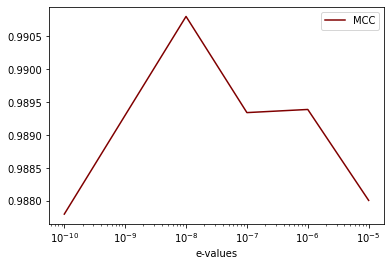

In [96]:
import pandas as pd
import matplotlib.pyplot as plt


data = []
with open("opt-table-final.txt","r") as f:
  i = 0
  for line in f:
      if i > 1:
          l = line.strip().split()
          data.append((float(l[1]), float(l[5])))
      i += 1

df = pd.DataFrame(data, columns=["e-values","MCC"])
df.plot(x ='e-values', y='MCC', kind = 'line', color = "maroon")
plt.xscale('log')
#plt.savefig('e-values.png', dpi = 300, bbox_inches='tight')
plt.show()


In [97]:
! python accuracy.py <(cat set-1.class set-2.class) 1e-8

TH: 1e-08 Accuracy: 0.9999892396561711 MCC: 0.9908035866650283 TN: 557263.0 FN: 2.0 FP: 4.0 TP: 334.0


The model seems well generalized, with an overall accuracy of 99%, and just 4 false positive and 2 false negative predictions.

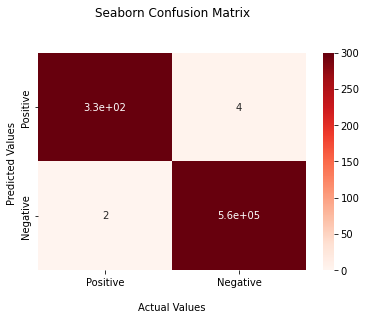

In [59]:
import numpy as np
import seaborn as sns

cf_matrix = np.array([[334,4],[2,557263]])

ax = sns.heatmap(cf_matrix, annot=True, cmap="Reds", vmin=0, vmax=300)

ax.set_title('Seaborn Confusion Matrix\n\n');
ax.set_xlabel('\nActual Values')
ax.set_ylabel('Predicted Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Positive','Negative'])
ax.yaxis.set_ticklabels(['Positive','Negative'])

## Display the visualization of the Confusion Matrix.
#plt.savefig('High_CM.png', dpi = 300, bbox_inches='tight')
plt.show()

In [60]:
! awk '{if ($2>1e-08 && $3==1) print $1}' <(cat set-1.class set-2.class)   #false negatives

D3GGZ8
O62247


Looking on Uniprot, it's possible to see that the 2 false negatives are actually 2 borderline cases. They are not certain to have the serine protease inibhitor function since they differ in some characteristics from other kunitz domain proteins. This would explain why the model labelled the proteins as negatives.

In [61]:
! awk '{if ($2<1e-08 && $3==0) print $1}' <(cat set-1.class set-2.class)   #false positives

P0DV03
P0DV05
P0DV04
P0DV06


The 4 false positives that were found are all isoforms of the PI-stichotoxin protein, which is a serin protease. By looking on uniprot there is a paper supporting the presence of the kunitz domain inside it, even if the pfam identifier cannot be found on the entries. There is a Prosite identifier for the kunitz domain. This explains why our model classified these proteins as positives, while we had them inside the negative set. We can assume than that they are actually positives.


# Sequence Logo
The sequence logo for the model was generated using Skylign.

![picture](https://raw.githubusercontent.com/pmastrogiovanni/kunitz_hmm/main/sequence_logo.png)